# Libraries Installation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Atomcamp/ML/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data Cleaning

In [ ]:
df.shape

(30, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

<Axes: >

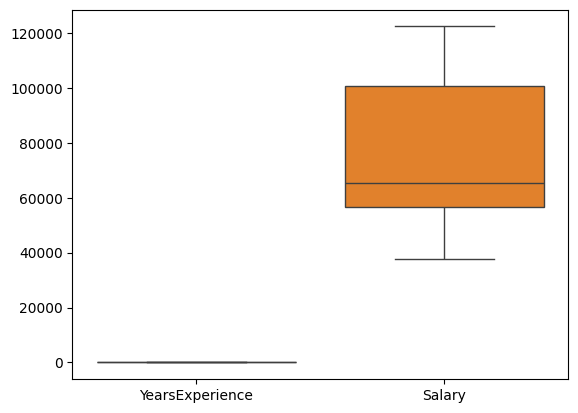

In [ ]:
sns.boxplot(data=df)

# Correlationship

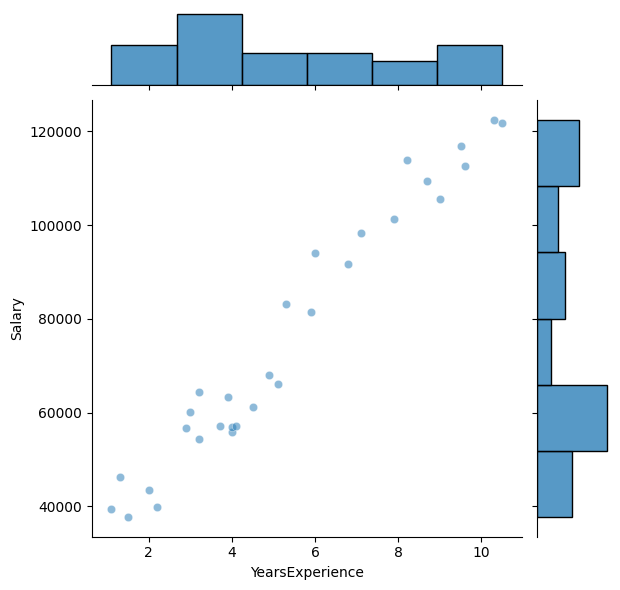

In [ ]:
sns.jointplot(x="YearsExperience", y ="Salary", data=df, alpha=0.5)

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = np.array([df["YearsExperience"]]).reshape(-1,1)

In [ ]:
x.shape

(30, 1)

In [ ]:
y = np.array([df["Salary"]]).reshape(-1,1)
y.shape

(30, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
lm.coef_

array([[9339.08172382]])

In [ ]:
predictions = lm.predict(x_test)

<Axes: >

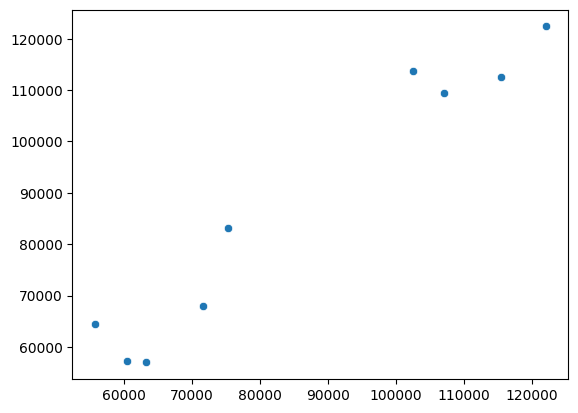

In [ ]:
# Convert predictions to a 1-dimensional array if it's not already
predictions = predictions.ravel()

sns.scatterplot(x=predictions, y=y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [ ]:
print("mean_absolute_error:", mean_absolute_error(y_test, predictions))
print("mean_squared_error:", mean_squared_error(y_test, predictions))
print("RMS:", math.sqrt(mean_squared_error(y_test, predictions)))

mean_absolute_error: 5161.328710400183
mean_squared_error: 37784662.46621314
RMS: 6146.92300799458


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f"R² score: {r2}")

R² score: 0.9414466227178214


In [ ]:
residuals = y_test - predictions

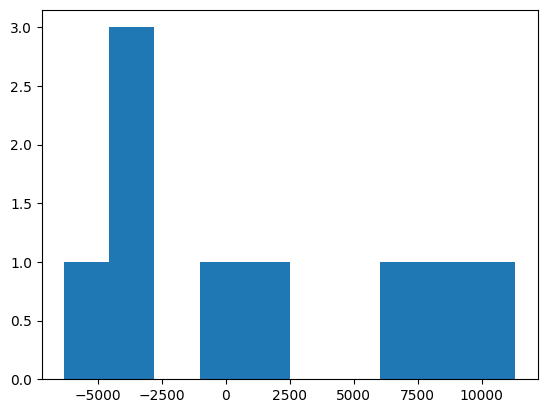

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib library

plt.hist(residuals) # Use the hist function from matplotlib
plt.show() # Display the histogram

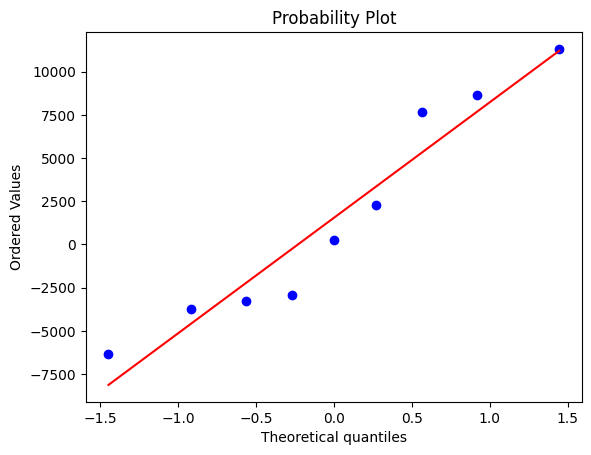

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()